In [1]:
from __future__ import absolute_import
from __future__ import print_function
from __future__ import division

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("./mnist")

Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [7]:
X_train, y_train = mnist.train.next_batch(10000)
X_test, y_test = mnist.test.next_batch(1000)

In [16]:
img = X_train[0]
img = img.reshape(28,28)

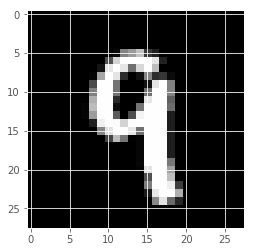

In [18]:
plt.imshow(img,cmap='gray')

In [19]:
n_steps = 28
n_inputs = 28
n_neurons = 200
n_outputs = 10

In [22]:
def tf_reset():
    try:
        sess.close()
    except:
        pass
    return tf.reset_default_graph()

In [23]:
tf_reset()

X = tf.placeholder(dtype=tf.float32,shape=[None,n_steps,n_inputs],name="X")
y = tf.placeholder(dtype=tf.int32,shape=[None])

In [24]:
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)

In [25]:
outputs, states = tf.nn.dynamic_rnn(basic_cell,X,dtype=tf.float32)

In [26]:
logits = tf.layers.dense(states,n_outputs)

In [27]:
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)

In [28]:
loss = tf.reduce_mean(xentropy)

In [29]:
optimizer = tf.train.GradientDescentOptimizer(0.01)

In [30]:
training_op = optimizer.minimize(loss)

In [31]:
correct = tf.nn.in_top_k(logits,y,1)
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

In [32]:
init=tf.global_variables_initializer()

In [34]:
test_digits = X_test.reshape((-1,n_steps, n_inputs))

In [35]:
n_epochs = 10
batch_size = 150

In [40]:
with tf.Session() as sess:
    init.run()
    
    for epochs in range(n_epochs):
        for iteration in range(mnist.train.num_examples//batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1,n_steps,n_inputs))
            sess.run(training_op,feed_dict={X:X_batch, y:y_batch})
        acc_train = accuracy.eval(feed_dict={X:X_batch, y:y_batch})
        acc_test = accuracy.eval(feed_dict={X:test_digits,y:y_test})
        
        print(epochs, "Training accuracy: ", acc_train, "Test accuracy: ", acc_test)

0 Training accuracy:  0.87333333 Test accuracy:  0.852
1 Training accuracy:  0.9266667 Test accuracy:  0.887
2 Training accuracy:  0.97333336 Test accuracy:  0.917
3 Training accuracy:  0.96 Test accuracy:  0.918
4 Training accuracy:  0.96 Test accuracy:  0.924
5 Training accuracy:  0.9533333 Test accuracy:  0.947
6 Training accuracy:  0.96666664 Test accuracy:  0.95
7 Training accuracy:  0.97333336 Test accuracy:  0.953
8 Training accuracy:  0.98 Test accuracy:  0.96
9 Training accuracy:  0.98 Test accuracy:  0.955
